# Analyse Gemiddeld 3

Het berekenen of thuisvoordeel bestaat

Bereken over alle seizoenen heen hoe vaak de thuisploeg won / gelijk speelde / verloor

Bereken over alle seizoenen heen hoe vaak de uitploeg won / gelijk speelde / verloor


In [5]:
# Importing the necessary packages
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np# Data Frame                           # Advanced data visualisation

In [6]:
# Laad de data
wedstrijden_data = pd.read_csv(r"C:\Users\Robbe\Documents\School_jaar_2\sem2\DEP\wedstrijden.csv", sep=";")
wedstrijden_data.head(10)

,Seizoen,Speeldag,Datum,Tijdstip,Id,StamnummerThuisploeg,RoepnaamThuisploeg,StamnummerUitploeg,RoepnaamUitploeg,StandThuis,StandUit
0,1960,1,1960-09-04,15:00,4008203,373,Sint-Truidense VV,16,Standard Luik,0,2
1,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,3,2
2,1960,1,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,0,7
3,1960,1,1960-09-04,15:00,4008206,13,Beerschot,33,Verviétois,1,0
4,1960,1,1960-09-04,15:00,4008207,3,Club Brugge,10,Union Saint-Gilloise,1,2
5,1960,1,1960-09-04,15:00,4008208,2,Daring Club Brussel,3434,Patro Eisden,2,1
6,1960,1,1960-09-04,15:00,4008209,4,RFC Luik,7,KAA Gent,2,1
7,1960,1,1960-09-04,15:00,4008210,553,Waterschei SV Thor,30,Lierse SK,5,0
8,1960,2,1960-09-11,15:00,4008211,16,Standard Luik,90,Eendracht Aalst,3,0
9,1960,2,1960-09-11,15:00,4008212,35,RSC Anderlecht,4,RFC Luik,2,3


In [11]:
# Uitslagen van de wedstrijden berekenen 
thuis_winst = (wedstrijden_data['StandThuis'] > wedstrijden_data['StandUit']).sum()
thuis_gelijk = (wedstrijden_data['StandThuis'] == wedstrijden_data['StandUit']).sum()
thuis_verlies = (wedstrijden_data['StandThuis'] < wedstrijden_data['StandUit']).sum()

# Contingentietabel opstellen 
contingency_table = [[thuis_winst, thuis_gelijk, thuis_verlies],
                     [thuis_verlies, thuis_gelijk, thuis_winst]]

contingency_table


[[8640, 4638, 4628], [4628, 4638, 8640]]

In [10]:
# Chi-kwadraattoets uitvoeren
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared value: {chi2}, P-value: {p}")

Chi-squared value: 2426.3105215556225, P-value: 0.0


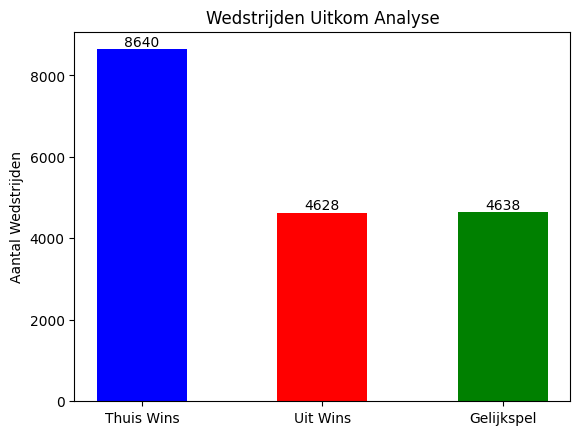

In [12]:
# Visualisatie instellen
labels = ['Thuis Wins', 'Uit Wins', 'Gelijkspel']
scores = [thuis_winst, thuis_verlies, thuis_gelijk]

fig, ax = plt.subplots()
ax.bar(labels, scores, color=['blue', 'red', 'green'], width=0.5)

ax.set_ylabel('Aantal Wedstrijden')
ax.set_title('Wedstrijden Uitkom Analyse')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

# Labels boven de bars toevoegen
for i, v in enumerate(scores):
    ax.text(i, v + 3, str(v), ha='center', va='bottom')

plt.show()